# matplotlib 한글깨짐 문제 해결방법
* local환경이 아니며, sudo권한이 없는 상황으로 엔지니어에게 요청해야 하는 상황일때

작성일자 :2020-12-22

----------------------------------------------------------------------
## 1. sudo권한으로 폰트설치
* 로컬 환경이 아니라서 서버 sudo권한 있는 사람에게 요청해서 한글폰트 설치해야됨
> import matplotlib.font_manager as fm <br>
fm.findSystemFonts(fontpaths=None, fontext='ttf')

* 위 코드 실행결과
    * ['/usr/share/fonts/liberation/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/liberation/NanumBarunGothic-YetHangul.ttf',
 '/usr/share/fonts/liberation/NanumMyeongjoEcoR.ttf',
 
    * 엔지니어에게 /usr/share/fonts/liberation/ 해당 경로에 한글폰트(ttf) 설치 요청

## 2.matplotlib 경로에 폰트이동
* matplotlib설정파일 위치 확인
    * print ('설정파일 위치: ', mpl.matplotlib_fname())
> fm.fontManager.ttflist

* 위 코드 실행결과 Nanum폰트가 들어가있어야됨.
    * [<Font 'NanumMyeongjo' (NanumMyeongjoExtraBold.ttf) normal normal bold normal>,
 <Font 'NanumSquare' (NanumSquareL.ttf) normal normal light normal>,
 <Font 'NanumBarunGothic YetHangul' (NanumBarunGothic-YetHangul.ttf) normal normal 400 normal>,
 <Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>,
 
## 3. matplotlib 캐시삭제
* 캐시위치확인
    * mpl.get_cachedir() 
* 캐시 삭제
    * rm -r ~/.cache/matplotlib/
* 결과
    * /data1/suhyuncho/.cache 이 위치에있던 matplotlib 디렉토리 삭제됨.

## 4. jupyter notebook 재시작 
* 엔지니어에게 요청

## 5. 폰트 설정
* 폰트설정 : 위에 fontMangaer.ttflist에 있는 나눔 폰트중 아무거나설정
    > plt.rcParams["font.family"] = 'NanumBarunGothic' <br>
    plt.plot(range(50), data, 'r')<br>
    plt.title('시간별 가격 추이')<br>

In [4]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -1,  49,  30, 104, 199, 167, 203, 283, 316, 299, 254, 242, 193,
       195, 190, 145, 169, 169,  74, 106, 152, 191, 188, 270, 274, 253,
       219, 164, 133, 168, 109, 123, 143, 234, 297, 319, 380, 343, 307,
       399, 475, 384, 397, 409, 461, 544, 446, 377, 344, 306])

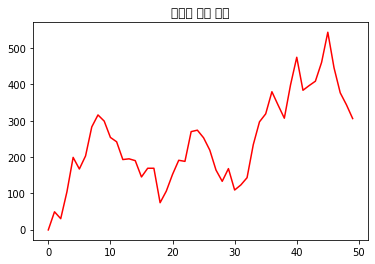

In [6]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이');
# plt.ylabel('주식 가격')
# plt.xlabel('시간(분)')

### matplotlib 설정파일 위치확인

In [7]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.1
설치 위치:  /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /data1/suhyuncho/.config/matplotlib
캐시 위치:  /data1/suhyuncho/.cache/matplotlib


In [8]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


### 시스템내에 설치되어있는 폰트 확인
* /usr/share/fonts/liberation

In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
## 나눔고딕 설치 요청해서 들어간거 확인.
font_list[:10] 

53


['/usr/share/fonts/liberation/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/liberation/NanumBarunGothic-YetHangul.ttf',
 '/usr/share/fonts/liberation/NanumMyeongjoEcoR.ttf',
 '/usr/share/fonts/liberation/NanumSquareR.ttf',
 '/usr/share/fonts/liberation/NanumGothicCoding.ttf',
 '/usr/share/fonts/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/liberation/NanumGothic.ttf',
 '/usr/share/fonts/liberation/LiberationMono-Regular.ttf']

### matplotlib fontManager에 있는 폰트 확인
* /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf
    * 이 경로안에 나눔 폰트가 들어있어야함 (엔지니어에게 설치요청)

In [7]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

53


['NanumMyeongjo',
 'NanumSquare',
 'NanumBarunGothic YetHangul',
 'NanumGothic',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'NanumSquare_ac',
 'DejaVu Serif',
 'DejaVu Sans',
 'Nanum Brush Script']

In [8]:
## 아래 경로에 있는 폰트리스트.여기안에 Nanum폰트가있어야됨.
# /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf
fm.fontManager.ttflist

[<Font 'NanumMyeongjo' (NanumMyeongjoExtraBold.ttf) normal normal bold normal>,
 <Font 'NanumSquare' (NanumSquareL.ttf) normal normal light normal>,
 <Font 'NanumBarunGothic YetHangul' (NanumBarunGothic-YetHangul.ttf) normal normal 400 normal>,
 <Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>,
 <Font 'NanumSquare_ac' (NanumSquare_acB.ttf) normal normal bold normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>,
 <Font 'Nanum Brush Script' (NanumBrush.ttf) normal normal 400 normal>,
 <Font 'NanumSquareRound' (NanumSquareRoundR.ttf) normal normal regular normal>,
 <Font 'NanumBarunGothic' (NanumBarunGothicLight.ttf) normal normal light normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>,


In [11]:
# 나눔폰트확인
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name][:5]

[('NanumMyeongjo',
  '/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoExtraBold.ttf'),
 ('NanumSquare',
  '/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareL.ttf'),
 ('NanumBarunGothic YetHangul',
  '/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic-YetHangul.ttf'),
 ('NanumGothic',
  '/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicExtraBold.ttf'),
 ('NanumSquare_ac',
  '/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquare_acB.ttf')]

In [12]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [13]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [14]:
# 참고) matplotlib cache 위치를  확인하는 방법
mpl.get_cachedir()

'/data1/suhyuncho/.cache/matplotlib'

### matplotlib 기본폰트 변경

In [16]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 글꼴
['NanumBarunGothic']


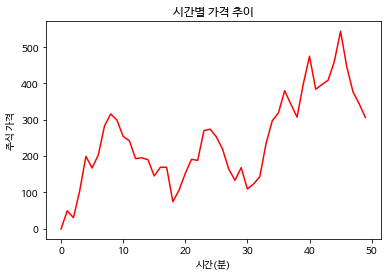

In [18]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# font_fname = '/usr/share/fonts/liberation/NanumBarunGothic.ttf'
# font_family = font_manager.FontProperties(fname=font_fname).get_name()
# plt.rcParams["font.family"] = font_family

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

------------------------------------------------------------------------------------
## 현재 디렉토리에 있는 폰트 지정해서 사용하는 방법
* ttf 폰트 파일을 복사해서 바로 사용할 수 도 있다. 
* 현재 디렉토리에 NanumGothic.ttf 파일을 복사하여 다음과 같이 ttf 파일을 지정하여 사용할 수 있다.


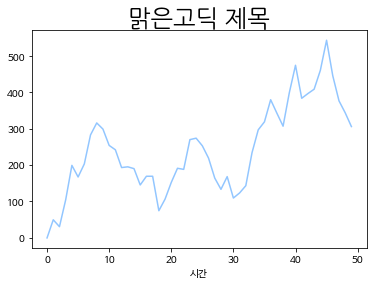

In [17]:
import matplotlib.font_manager as fm

fontprop = fm.FontProperties(fname="NanumGothic.ttf", size=24)
#fontprop = fm.FontProperties(fname="./data1/suhyuncho/personal/fonts/NanumGothic.ttf", size=24)
plt.title('맑은고딕 제목', fontproperties=fontprop)
plt.xlabel('시간')
plt.plot(data)
plt.show();

In [13]:
mpl.get_data_path()

'/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data'

In [16]:
Path(mpl.get_data_path(), "fonts/ttf/NanumGothic.ttf")

PosixPath('/data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf')

In [14]:
Path('/data1/suhyuncho/personal/fonts', "NanumGothic.ttf")

PosixPath('/data1/suhyuncho/personal/fonts/NanumGothic.ttf')

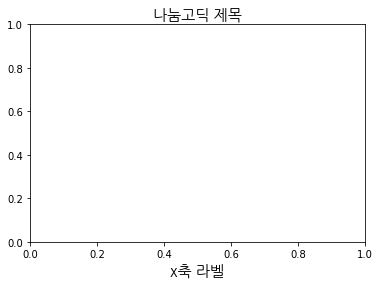

In [29]:
from matplotlib import font_manager as fm
prop = fm.FontProperties(fname='/data1/suhyuncho/personal/fonts/NanumGothic.ttf',size=15)

fig, ax = plt.subplots()
plt.title('나눔고딕 제목', fontproperties=prop)
ax.set_xlabel('x축 라벨',fontproperties=prop);